In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/mrseleznev/Desktop/проект/SALES.csv', sep=';')

In [3]:
df.rename(columns={'store_id': 'Store_id', 'sku_id': 'SKU_id', 'date': 'Date',
                   'regular_price': 'Regular_Price', 'sales': 'Sales', 'stock': 'Stock'}, inplace=True)
df.drop(['sales_promo', 'promo_price'], axis=1, inplace=True)
df

,Store_id,SKU_id,Date,Sales,Regular_Price,Stock
0,1114,114,01JAN2019,0.0,51.000,1.0
1,1134,114,01JAN2019,0.0,29.000,1.0
2,1100,114,01JAN2019,0.0,42.125,1.0
3,1136,114,01JAN2019,0.0,31.000,2.0
4,1191,114,01JAN2019,0.0,53.000,2.0
...,...,...,...,...,...,...
23800119,1109,337810,28DEC2019,1.0,145.000,0.0
23800120,1092,337810,28DEC2019,1.0,144.000,0.0
23800121,1117,337810,29DEC2019,1.0,151.000,0.0
23800122,2834,337810,29DEC2019,1.0,151.000,0.0


In [4]:
df.shape

(23800124, 6)

In [5]:
df = df.loc[df['Stock'] > df['Sales']]

df['Demand'] = df.loc[df['Stock'] > 0, 'Sales']
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index(['SKU_id', 'Store_id', 'Date'], inplace=True)

In [7]:
level_values = df.index.get_level_values
df_w = (df.groupby([level_values(i) for i in [0,1]]
                      +[pd.Grouper(freq='W', level=-1)]).mean())
# агрегация исходных данные в разрезе SKU|Store|Week

In [8]:
df_w.reset_index(inplace=True)
df.reset_index(inplace=True)

In [9]:
df

,SKU_id,Store_id,Date,Sales,Regular_Price,Stock,Demand
0,114,1114,2019-01-01,0.0,51.000000,1.0,0.0
1,114,1134,2019-01-01,0.0,29.000000,1.0,0.0
2,114,1100,2019-01-01,0.0,42.125000,1.0,0.0
3,114,1136,2019-01-01,0.0,31.000000,2.0,0.0
4,114,1191,2019-01-01,0.0,53.000000,2.0,0.0
...,...,...,...,...,...,...,...
16848736,337810,1080,2019-03-31,0.0,135.000000,7.0,0.0
16848737,337810,1079,2019-03-31,0.0,148.485356,5.0,0.0
16848738,337810,1078,2019-03-31,0.0,139.000000,11.0,0.0
16848739,337810,1077,2019-03-31,1.0,142.000000,17.0,1.0


In [10]:
df_w

,SKU_id,Store_id,Date,Sales,Regular_Price,Stock,Demand
0,114,1078,2019-01-06,0.166667,51.000000,2.000000,0.166667
1,114,1078,2019-01-13,0.000000,51.000000,1.714286,0.000000
2,114,1078,2019-01-20,0.000000,51.000000,1.571429,0.000000
3,114,1078,2019-01-27,0.000000,51.000000,1.333333,0.000000
4,114,1078,2019-02-03,0.000000,51.000000,1.000000,0.000000
...,...,...,...,...,...,...,...
2579996,337810,2834,2019-03-03,1.428571,142.678127,582.142857,1.428571
2579997,337810,2834,2019-03-10,0.428571,145.000000,669.571429,0.428571
2579998,337810,2834,2019-03-17,1.571429,141.781269,714.571429,1.571429
2579999,337810,2834,2019-03-24,1.285714,140.862081,762.142857,1.285714


In [11]:
sku_store_count_day = len(set(zip(df['SKU_id'], df['Store_id'])))
sku_store_count_week = len(set(zip(df_w['SKU_id'], df_w['Store_id'])))
print(sku_store_count_day, sku_store_count_day == sku_store_count_week)

223014 True


Кол-во пар sku|store в df такое же как и в df_w

In [12]:
popular_pairs_day = df.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)

popular_sku_day = df.groupby(['SKU_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_sku_day

,SKU_id,counts
0,61591,14452
1,147199,14387
2,2438,14326
3,14409,14320
4,29880,14297
...,...,...
2079,126248,1
2080,306040,1
2081,138792,1
2082,32288,1


In [13]:
popular_pairs = df_w.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)

popular_sku_week = df_w.groupby(['SKU_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_sku_week

,SKU_id,counts
0,29880,2102
1,14094,2101
2,130202,2100
3,14409,2100
4,2438,2100
...,...,...
2079,126248,1
2080,306040,1
2081,138792,1
2082,7696,1


In [14]:
def transform(x, ttype):
    '''
    Accepts vector and performs transformation on it based on ttype
    '''
    if ttype == 'log':
        return np.log1p(x)
    
    return np.array(x)

In [15]:
def coef(model):
    """
    return regression coefficient of model
    """
    return model.params[1] if len(model.params) > 1 else model.params[0]

def pvalue(model):
    """
    return regression coefficient's t-test p-value of model
    """
    return model.pvalues[1] if len(model.pvalues) > 1 else model.pvalues[0]

In [16]:
def elasticity(X, y, model, model_type):
    '''
    Computes elasticity of model based on X, y, model itself and model's type
    '''
    if model_type == 'lin-lin':
        return coef(model) * np.mean(X) / np.mean(y)
    elif model_type == 'log-lin':
        return coef(model) * np.mean(X)
    elif model_type == 'log-log':
        return coef(model)

In [17]:
def PEDmodel(X, y, model_type='lin-lin'):
    '''
    Makes PED model based on input data X, y and model type
    '''
    _types = model_type.split('-')
    
    act_x = transform(X, _types[1])
    act_x = sm.add_constant(act_x)
    
    act_y = transform(y, _types[0])
    
    return sm.OLS(act_y, act_x).fit()

In [18]:
def get_model_stats(X, y, model, model_type):
    '''
    returns model's statistics
        regression coefficient,
        R-squared,
        T-test p-value,
        elasticity
    '''
    elas = elasticity(X, y, model, model_type)
    
    return coef(model), model.rsquared, pvalue(model), elas

In [19]:
day_sample_size = [x for x in range(10, 100, 10)] + [x for x in range(100, 1000, 100)] + [x for x in range(1000, 5000, 500)] + [x for x in range(5000, 14001, 1000)]
week_sample_size = [x for x in range(10, 100, 10)] + [x for x in range(100, 1000, 100)] + [x for x in range(1000, 2001, 500)]

popular_pairs_day = df.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_pairs_week = df_w.groupby(['SKU_id', 'Store_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)

popular_sku_days = df.groupby(['SKU_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
popular_sku_weeks = df_w.groupby(['SKU_id']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)

min_elast, max_elast = -10, 0
p_value = 0.05

def GeneratePEDModels(dataset, date_type='day'):
    all_model_types = ['log-log']
    sku_id, store_id, coeff, rsquared, ttpvalue, elas, mtype = [], [], [], [], [], [], []
    qty = []
    sample_sizes = []
    
    if date_type == 'day':
        global_sample_sizes = day_sample_size
        popular_sku = popular_sku_days
    if date_type == 'week':
        global_sample_sizes = week_sample_size
        popular_sku = popular_sku_weeks
        
    sku_for_experiment = []
    for i, r in popular_sku.iterrows():
        #всего sku в нашей выборке 
        if i == 2084:
            break
        sku_for_experiment.append(r['SKU_id'])
    
    
        
    #идем по всем парам sku|store
    for good_id in sku_for_experiment:
        #выбираем строки с конкретным значением sku|store
        sku_data = dataset[(dataset.SKU_id == good_id)]
        if sku_data.Demand.sum() == 0:
            continue
        #идем по всем размерам
        for current_sample_size in global_sample_sizes:
            #делаем проверку на SampleSize (достаточность)
            if sku_data.shape[0] < current_sample_size:
                break
            #разбиваем данные на сэмплы
            data = sku_data.sample(n=current_sample_size, replace=False)
            #делаем проверку на то, что если у нас всего одно значение demand и оно 0 или если такой пары sku|store нету
            if (len(data.Demand) == 1 and data.loc[0, 'Demand'] == 0) or data.empty == True or data.Demand.sum() == 0:
                continue
            #суммируем спрос
            curQty = data.Demand.sum()
            
            #подсчет адекватных значений
            
            сur_adeq_demand = data.Demand 
            
            #теперь идем по всем моделям
            for model_type in all_model_types:
                #строим модель где в роли признака - цена, таргет - спрос
                model = PEDmodel(data.Regular_Price, data.Demand, model_type)
                #считаем статистику
                c, r2, tp, e = get_model_stats(data.Regular_Price, data.Demand, model, model_type)

                sku_id.append(good_id)
                coeff.append(c)
                rsquared.append(r2)
                ttpvalue.append(tp)
                elas.append(e)
                mtype.append(model_type)
                qty.append(curQty)
                sample_sizes.append(current_sample_size)
    
    return pd.DataFrame({
        'SKU': sku_id,
        'Coefficient': coeff,
        'R-squared': rsquared,
        'T-test-p-value': ttpvalue,
        'Model-type': mtype,
        'Elasticity': elas,
        'Qty': qty,
        'SampleSize': sample_sizes
    })

In [20]:
sample_data_day = GeneratePEDModels(df)
sample_data_day['Гранулярность эластичности'] = 'SKU'
sample_data_day['Гранулярность trainset'] = 'SKU|Day'
#sample_data.to_csv('sample_data.csv', index=False)

In [21]:
sample_data_week = GeneratePEDModels(df_w, date_type='week')
sample_data_week['Гранулярность эластичности'] = 'SKU'
sample_data_week['Гранулярность trainset'] = 'SKU|Week'

In [22]:
sample_data_day.to_csv('sample_data_day.csv', index=False)
sample_data_day

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,61591,-2.405077,6.474439e-02,0.478051,log-log,-2.405077,18.0,10,SKU,SKU|Day
1,61591,0.763322,2.898637e-02,0.472981,log-log,0.763322,31.0,20,SKU,SKU|Day
2,61591,4.964971,9.555465e-02,0.096480,log-log,4.964971,62.0,30,SKU,SKU|Day
3,61591,1.617859,2.776692e-02,0.304103,log-log,1.617859,70.0,40,SKU,SKU|Day
4,61591,1.448478,1.243436e-02,0.440733,log-log,1.448478,109.0,50,SKU,SKU|Day
...,...,...,...,...,...,...,...,...,...,...
45659,150825,-3.896102,4.761871e-02,0.544739,log-log,-3.896102,1.0,10,SKU,SKU|Day
45660,150825,-7.806172,1.071384e-01,0.158916,log-log,-7.806172,4.0,20,SKU,SKU|Day
45661,124311,0.012726,-2.220446e-16,0.343436,log-log,0.012726,1.0,10,SKU,SKU|Day
45662,124311,0.006363,0.000000e+00,0.329877,log-log,0.006363,1.0,20,SKU,SKU|Day


In [23]:
sample_data_week.to_csv('sample_data_week.csv', index=False)
sample_data_week

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,29880,-7.680302,2.318966e-01,0.158764,log-log,-7.680302,24.238095,10,SKU,SKU|Week
1,29880,-8.564184,7.866005e-02,0.231020,log-log,-8.564184,65.000000,20,SKU,SKU|Week
2,29880,-1.381466,1.749539e-02,0.485953,log-log,-1.381466,67.309524,30,SKU,SKU|Week
3,29880,-5.366010,9.145873e-02,0.057866,log-log,-5.366010,102.714286,40,SKU,SKU|Week
4,29880,-2.919996,1.741271e-01,0.002571,log-log,-2.919996,118.790476,50,SKU,SKU|Week
...,...,...,...,...,...,...,...,...,...,...
29202,7391,-0.495395,1.632383e-04,0.972056,log-log,-0.495395,6.028571,10,SKU,SKU|Week
29203,89969,-0.068076,1.230083e-03,0.923373,log-log,-0.068076,0.184524,10,SKU,SKU|Week
29204,221157,-0.407742,1.666667e-01,0.241504,log-log,-0.407742,0.428571,10,SKU,SKU|Week
29205,88621,0.053937,0.000000e+00,0.009507,log-log,0.053937,2.023810,10,SKU,SKU|Week


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
Y = ['Coefficient', 'R-squared', 'Elasticity']

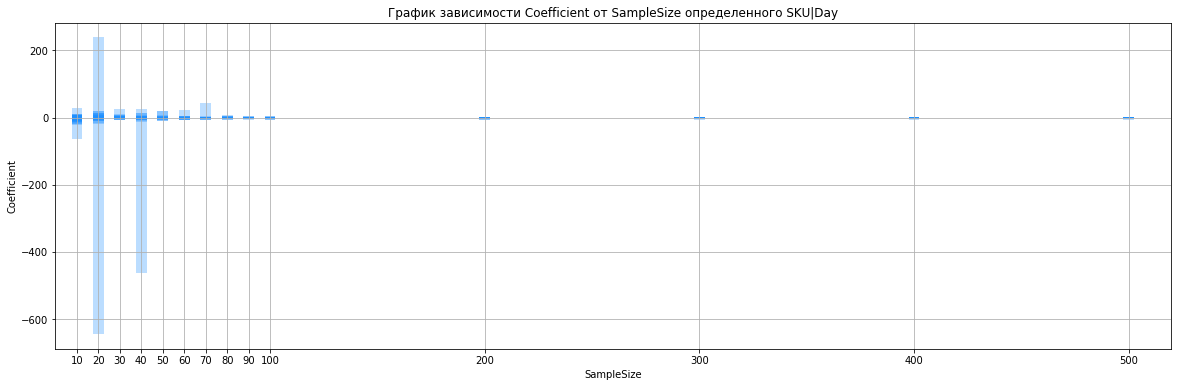

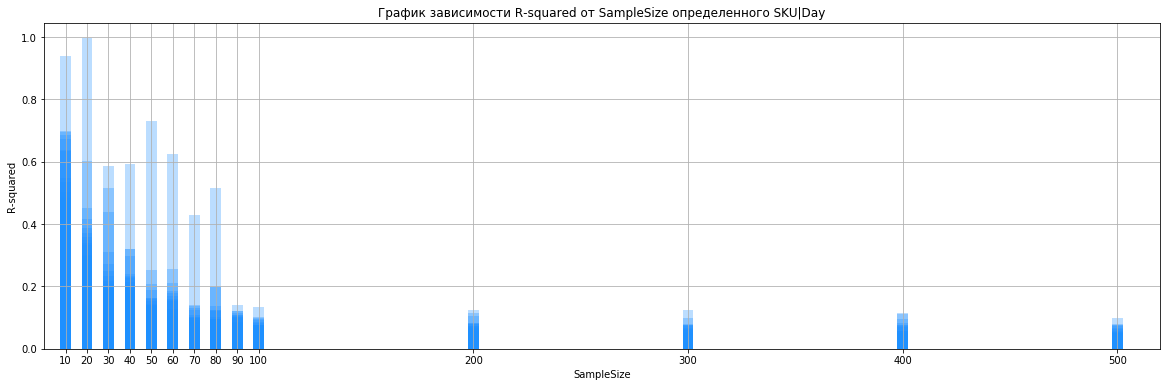

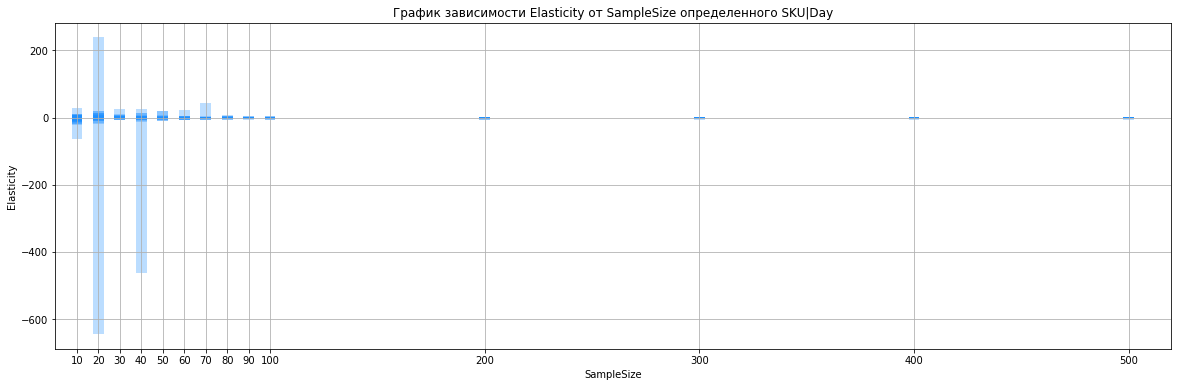

In [26]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_day['SampleSize'], height=sample_data_day[y], 
           width=5, color='dodgerblue', alpha=0.3)
    plt.xlim([0, 520])      #  диапазон оси x
    fig.set_figwidth(20)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks([x for x in range(10, 100, 10)] + [x for x in range(100, 501, 100)])
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного SKU|Day')
    
    plt.show()

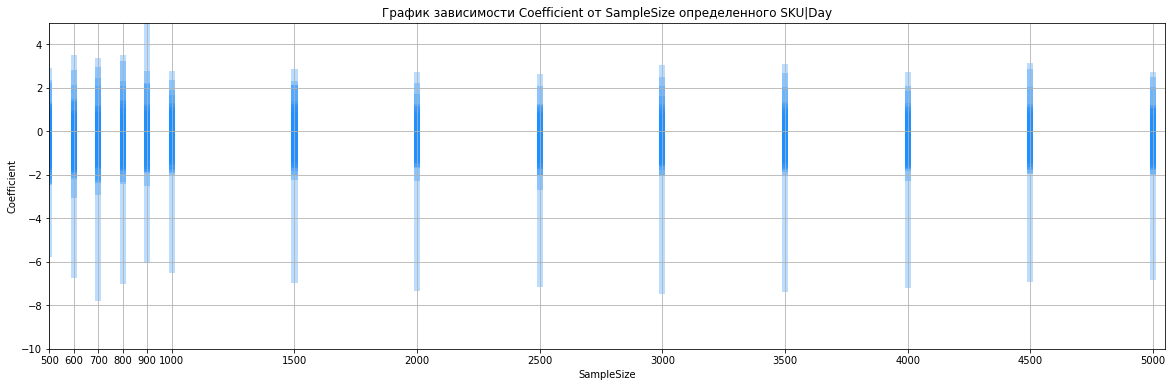

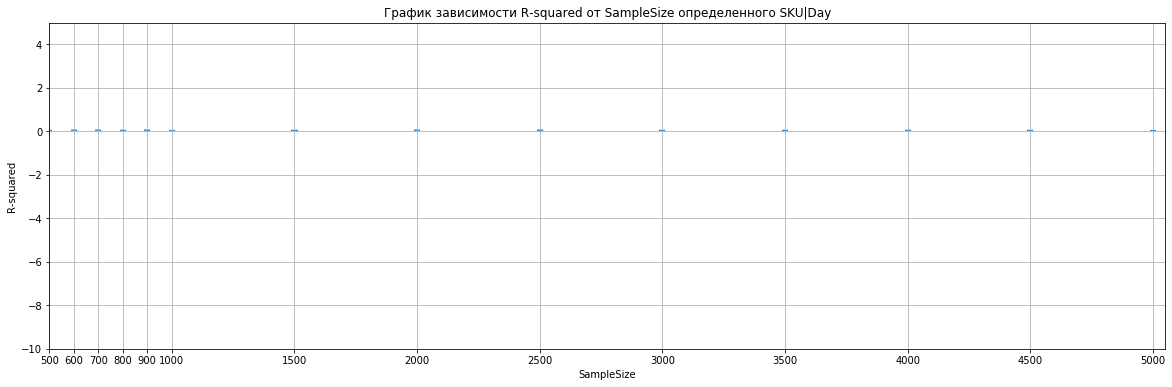

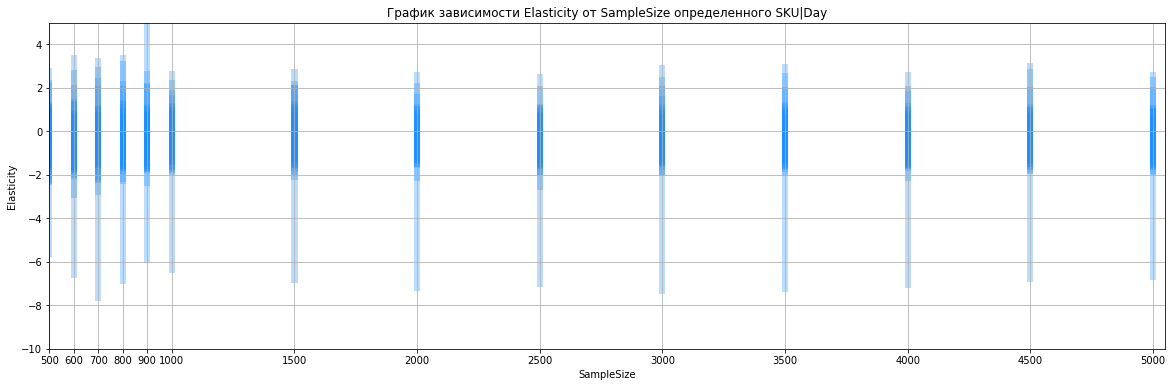

In [27]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_day['SampleSize'], height=sample_data_day[y], 
           width=25, color='dodgerblue', alpha=0.3)
    plt.xlim([520, 5050])      #  диапазон оси x
    plt.ylim([-10, 5])
    fig.set_figwidth(20)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks([x for x in range(500, 1000, 100)] + [x for x in range(1000, 5001, 500)])
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного SKU|Day')
    
    plt.show()

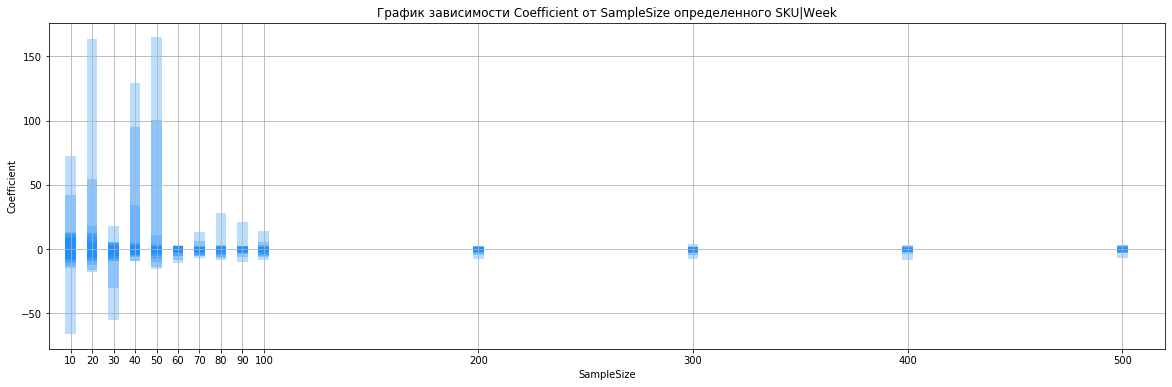

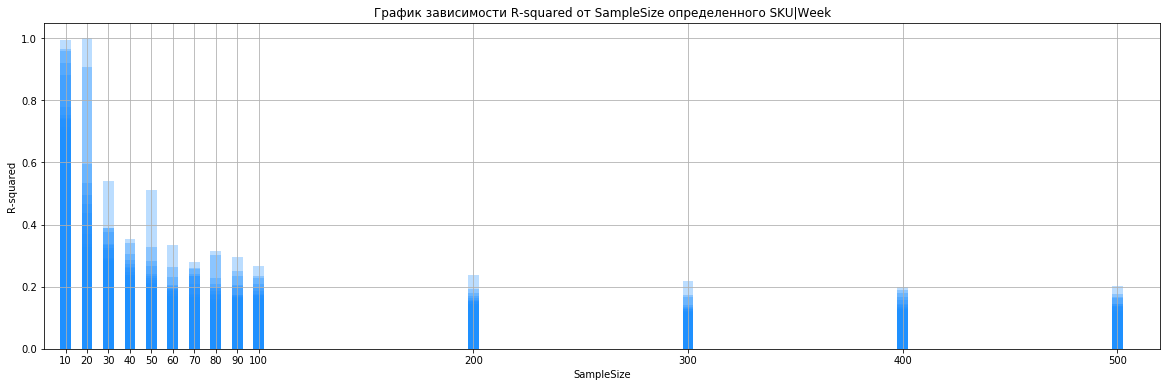

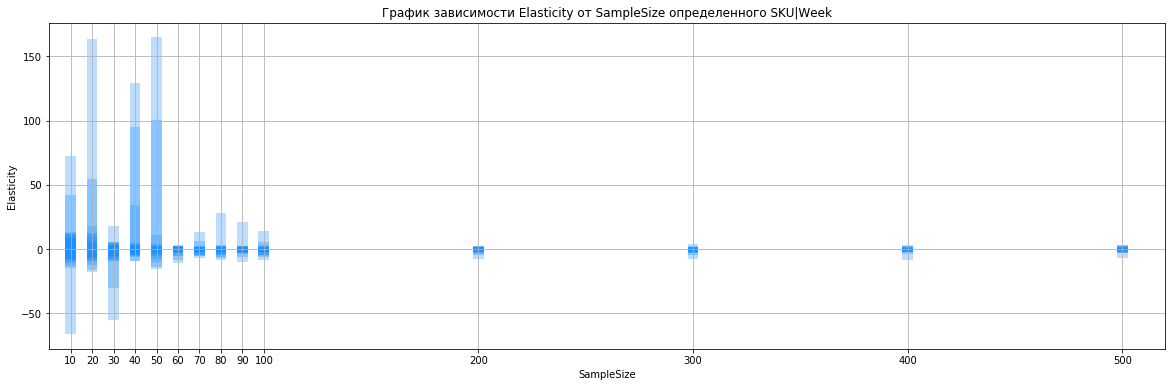

In [28]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_week['SampleSize'], height=sample_data_week[y], 
           width=5, color='dodgerblue', alpha=0.3)
    plt.xlim([0, 520])      #  диапазон оси x
    fig.set_figwidth(20)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks([x for x in range(10, 100, 10)] + [x for x in range(100, 501, 100)])
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного SKU|Week')
    
    plt.show()

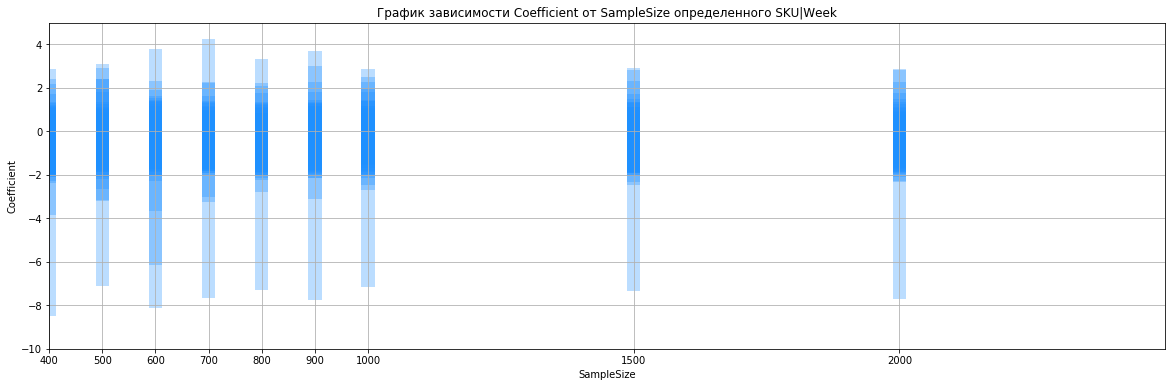

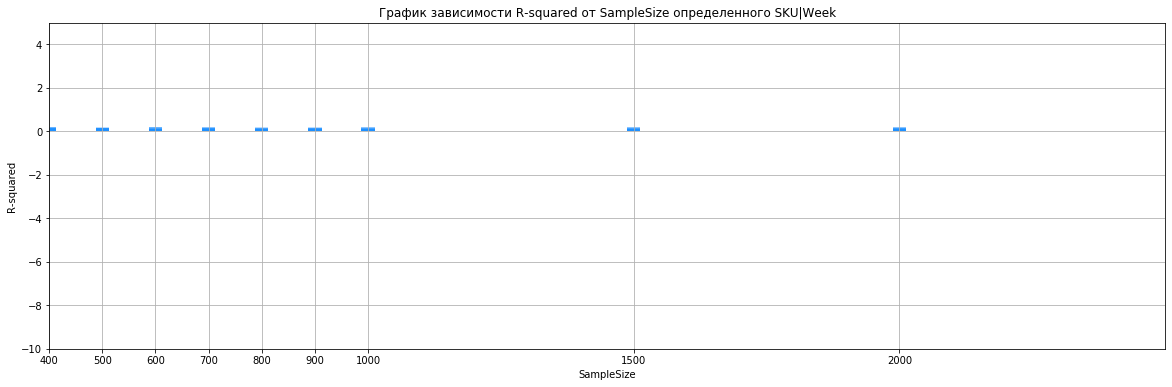

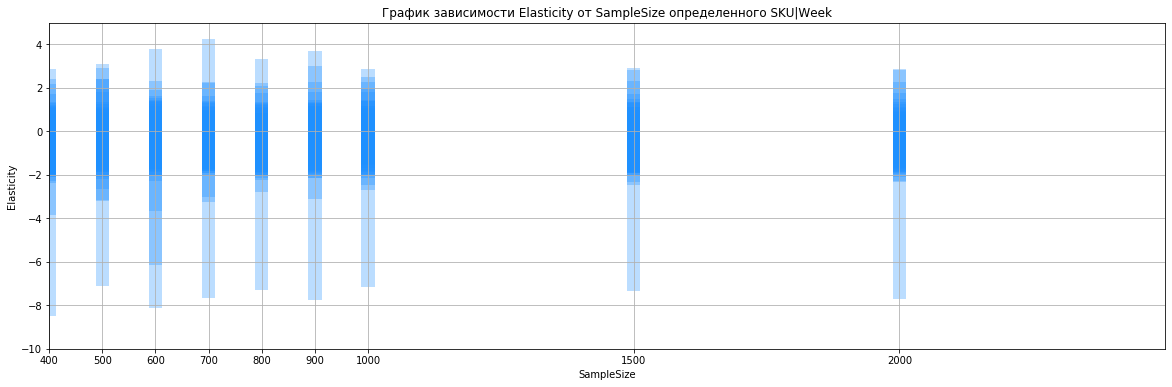

In [29]:
for y in Y:
    fig, ax = plt.subplots()
    ax.bar(x=sample_data_week['SampleSize'], height=sample_data_week[y], 
           width=25, color='dodgerblue', alpha=0.3)
    plt.xlim([400, 2500])      #  диапазон оси x
    plt.ylim([-10, 5])
    fig.set_figwidth(20)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.xticks([x for x in range(400, 1000, 100)] + [x for x in range(1000, 2500, 500)])
    plt.grid() # сетка
    
    plt.xlabel('SampleSize')
    plt.ylabel(y)
    plt.title('График зависимости ' + y + ' от SampleSize определенного SKU|Week')
    
    plt.show()

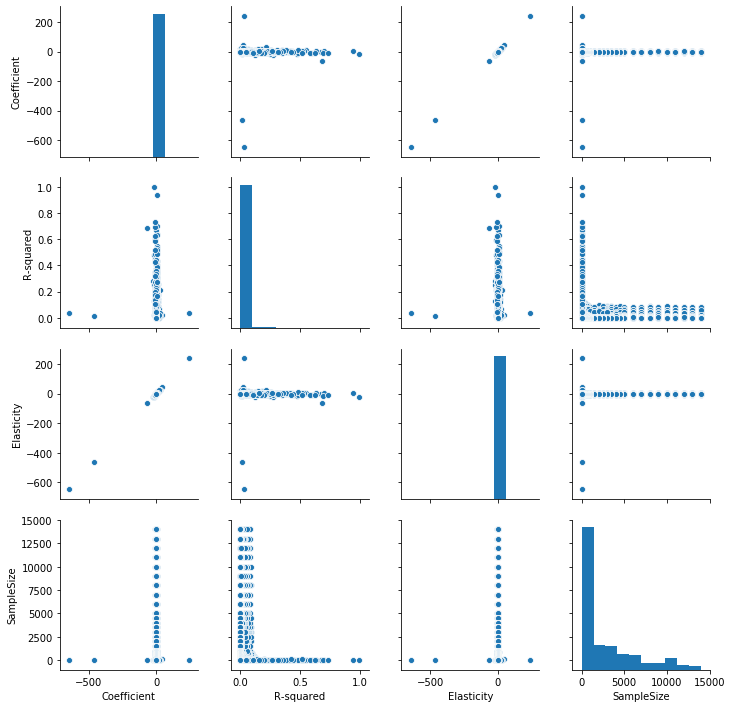

In [30]:
sns.pairplot(sample_data_day[Y + ['SampleSize']]);

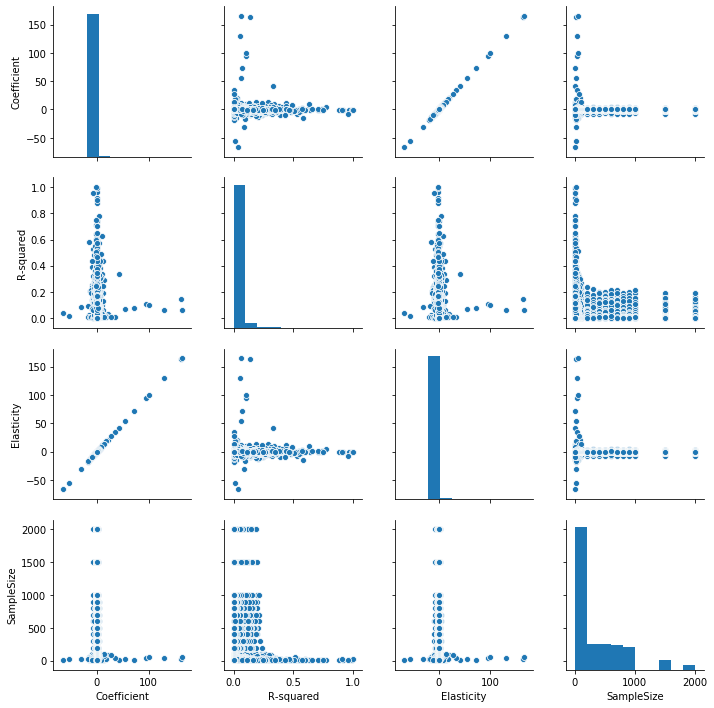

In [31]:
sns.pairplot(sample_data_week[Y + ['SampleSize']]);

# Подсчет адекватных значений

In [32]:
sample_data_day.isna().sum()

SKU                             0
Coefficient                     0
R-squared                       0
T-test-p-value                925
Model-type                      0
Elasticity                      0
Qty                             0
SampleSize                      0
Гранулярность эластичности      0
Гранулярность trainset          0
dtype: int64

In [33]:
sample_data_day.dropna(inplace=True)

In [34]:
#адекватные значения
min_elast, max_elast = -10, 0
p_value = 0.05

In [35]:
#считаем адекватные значения для SKU_id|Day
sample_data_day['flag_AE'] = ((sample_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_day['flag_Robust&AE'] = ((sample_data_day['flag_AE']) &
                                               (sample_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [36]:
sku_adeq_day = sample_data_day.groupby(['SampleSize']).mean()

sku_adeq_day.reset_index(inplace=True)
sku_adeq_day = sku_adeq_day.loc[:, ['SampleSize', 'flag_AE', 'flag_Robust&AE', 'Elasticity']]
sku_adeq_day.rename(columns={'flag_AE' : '%QTY_AE', 'flag_Robust&AE' : '%Robust&AE'}, inplace=True)
sku_adeq_day

,SampleSize,%QTY_AE,%Robust&AE,Elasticity
0,10,0.455923,0.009642,-0.312990
1,20,0.481122,0.015102,-0.591673
2,30,0.434457,0.014981,-0.033896
3,40,0.434632,0.020779,-0.460646
4,50,0.438742,0.020695,-0.060545
5,60,0.430566,0.023274,-0.080823
6,70,0.445378,0.022154,-0.058183
7,80,0.427162,0.029590,-0.083731
8,90,0.411765,0.026806,-0.049606
9,100,0.387528,0.033408,-0.048439


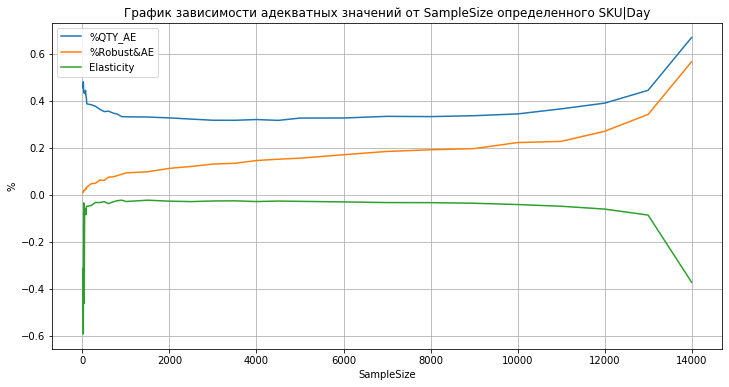

In [37]:
ae_stats = ['%QTY_AE', '%Robust&AE', 'Elasticity']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Day')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats:
    ax.plot(sku_adeq_day.SampleSize, sku_adeq_day[ae_stat], label=ae_stat)
    ax.legend()

In [38]:
#считаем адекватные значения для SKU_id|Week
sample_data_week['flag_AE'] = ((sample_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_week['flag_Robust&AE'] = ((sample_data_week['flag_AE']) &
                                               (sample_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [39]:
sku_adeq_week = sample_data_week.groupby(['SampleSize']).mean()

sku_adeq_week.reset_index(inplace=True)
sku_adeq_week = sku_adeq_week.loc[:, ['SampleSize', 'flag_AE', 'flag_Robust&AE', 'Elasticity']]
sku_adeq_week.rename(columns={'flag_AE' : '%QTY_AE', 'flag_Robust&AE' : '%Robust&AE'}, inplace=True)
sku_adeq_week

,SampleSize,%QTY_AE,%Robust&AE,Elasticity
0,10,0.483819,0.028317,-0.055471
1,20,0.453513,0.033357,0.030297
2,30,0.430320,0.046227,-0.152152
3,40,0.435591,0.047809,0.077151
4,50,0.441738,0.058591,0.074308
5,60,0.434811,0.050298,-0.074479
6,70,0.432237,0.057237,-0.064647
7,80,0.411880,0.062663,-0.054310
8,90,0.417214,0.059790,-0.051676
9,100,0.423329,0.075360,-0.064501


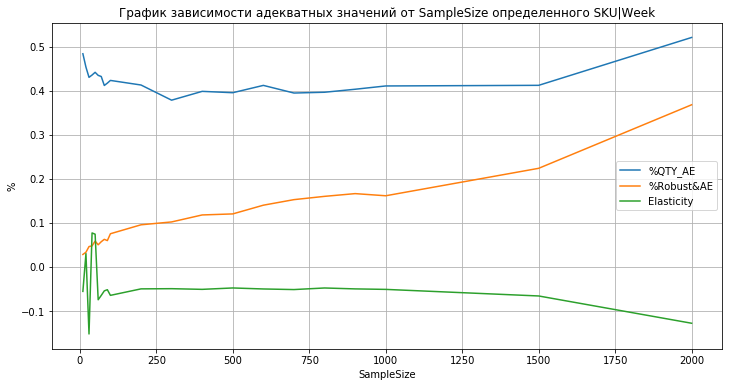

In [40]:
ae_stats = ['%QTY_AE', '%Robust&AE', 'Elasticity']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Week')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats:
    ax.plot(sku_adeq_week.SampleSize, sku_adeq_week[ae_stat], label=ae_stat)
    ax.legend()